# MNIST data learning

## 1. import necessary lib

In [7]:
import torch 
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## 2. load dataset and initial hyper parameter

In [6]:
torch.manual_seed(27) #reproducible
EPOCH = 4
BATCH_SIZE = 128

train_data = torchvision.datasets.MNIST(
    root='./mnist', #保存位置
    train=True, #training set
    transform=torchvision.transforms.ToTensor(), #converts a PIL.Image to torch.FloatTensor(C*H*W) in range(0.0,1.0)
    download=True
)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_data = torchvision.datasets.MNIST(
    root='./MNIST',
    train=False,
    transform=torchvision.transforms.ToTensor()
)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE,shuffle=False)

## 3. define network structure

In [8]:
torch.manual_seed(27)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.fc1 = nn.Linear(28*28,10)
        torch.nn.init.normal(self.fc1.weight, mean=0, std=0.01)
        #nn.init.xavier_normal(self.fc1.weight,gain =1)
        nn.init.constant(self.fc1.bias, 0.1)
    
        self.fc2 = nn.Linear(10,10)
        torch.nn.init.normal(self.fc2.weight, mean=0, std=0.01)
        #nn.init.xavier_normal(self.fc2.weight,gain = 1)
        nn.init.constant(self.fc2.bias, 0.01)
       # self.out = nn.Linear(10,10)
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x))
        output = x
        #output = self.out(x)
        return output
    
cnn = CNN()
print(cnn)

CNN (
  (fc1): Linear (784 -> 10)
  (fc2): Linear (10 -> 10)
)


## 4. optimizer and loss function

In [9]:
learning_rate = 0.2
l2 = 1e-5
# optimizer:adagrad
optimizer = torch.optim.SGD(cnn.parameters(), lr=learning_rate)
#loss function:cross-entropy with l2 regularizaiton
loss_func = nn.CrossEntropyLoss()

## 5.training process

In [17]:
#training loop
for epoch in range(EPOCH):
    running_loss = 0.0
    for i, data in enumerate(train_loader,0):
       # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        cnn.zero_grad()

        # forward + backward + optimize
        outputs = cnn(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        #for params in cnn.parameters():
            
            #n = params.dim()
                #print(params.grad.data[0])
            #if n == 2:
            #    print(params.grad.data[0,5],params.data[0,5])
            #params.data -= learning_rate*params.grad.data
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.8f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
print('Finished Training')

[1,   100] loss: 2.30238650
[1,   200] loss: 2.30104868
[1,   300] loss: 2.27694755
[1,   400] loss: 2.21926037
[2,   100] loss: 1.95972341
[2,   200] loss: 1.84551210
[2,   300] loss: 1.78376088
[2,   400] loss: 1.75421437
[3,   100] loss: 1.68753595
[3,   200] loss: 1.65111746
[3,   300] loss: 1.62704096
[3,   400] loss: 1.61095983
[4,   100] loss: 1.59808421
[4,   200] loss: 1.59467835
[4,   300] loss: 1.58534420
[4,   400] loss: 1.58081706
Finished Training


## 6. result

In [18]:
correct = 0
total = 0
for data in test_loader:
    images, labels = data
    outputs = cnn(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 90 %


## 7.different learning_rate training

In [16]:
def train(learning_rate,idx):
    torch.manual_seed(27)
    # network structure
    class CNN(nn.Module):
        def __init__(self,D_in,H,D_out):
            super(CNN, self).__init__()
            self.fc1 = nn.Linear(D_in,H)
            #torch.nn.init.normal(self.fc1.weight, mean=0, std=0.01)
            nn.init.xavier_normal(self.fc1.weight,gain = 1)
            nn.init.constant(self.fc1.bias, 0.1)
        
            self.fc2 = nn.Linear(H,D_out)
            #torch.nn.init.normal(self.fc2.weight, mean=0, std=0.01)
            nn.init.xavier_normal(self.fc2.weight, gain = 1)
            nn.init.constant(self.fc2.bias, 0.1)
           # self.out = nn.Linear(10,10)
        
        def forward(self, x):
            x = x.view(-1, 784)
            x = F.relu(self.fc1(x))
            x = F.softmax(self.fc2(x))
            output = x
            #output = self.out(x)
            return output
        
    D_in,H,D_out = 784,10,10
    cnn = CNN(D_in,H,D_out)
    optimizer = torch.optim.SGD(cnn.parameters(), lr=learning_rate)
    #loss function:cross-entropy with l2 regularizaiton
    loss_func = nn.CrossEntropyLoss()
    for epoch in range(EPOCH):
        running_loss = 0.0
        for i, data in enumerate(train_loader,0):
           # get the inputs
            inputs, labels = data

            # wrap them in Variable
            inputs, labels = Variable(inputs), Variable(labels)

            # zero the parameter gradients
            cnn.zero_grad()

            # forward + backward + optimize
            outputs = cnn(inputs)
            loss = loss_func(outputs, labels)
            loss.backward()
            #for params in cnn.parameters():
            
            #n = params.dim()
                #print(params.grad.data[0])
            #if n == 2:
            #    print(params.grad.data[0,5],params.data[0,5])
            #params.data -= learning_rate*params.grad.data
            optimizer.step()
            running_loss += loss.data[0]
            if i % 100 == 0:    # print every 2000 mini-batches
                if i!=0:
                    print('[%d, %5d] loss: %.8f' %(epoch + 1, i , running_loss / 100))
                running_loss = 0.0
                correct = 0.0
                total = 0.0
                for data in test_loader:
                    images, labels = data
                    outputs = cnn(Variable(images))
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum()
                    #result_data[idx][i/100+epoch*4] = correct/total
                result_data1[idx][int(i/100)+epoch*5] = correct/total
    print('Finished Training')
    correct = 0.0
    total = 0.0
    for data in test_loader:
        images, labels = data
        outputs = cnn(Variable(images))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    print('lr:%f Accuracy: %f' % (learning_rate,(correct / total)))

In [17]:
np.random.seed(8)

x_lr = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
result_data = np.zeros((len(x_lr),20))
result_data1 = np.zeros((len(x_lr),20))

for index in range(0, len(x_lr)):
    lr = x_lr[index]
    train(lr,index)

[1,   100] loss: 2.20956136
[1,   200] loss: 2.03181814
[1,   300] loss: 1.94424488
[1,   400] loss: 1.88937952
[2,   100] loss: 1.78896690
[2,   200] loss: 1.74361686
[2,   300] loss: 1.71930199
[2,   400] loss: 1.69929028
[3,   100] loss: 1.68035983
[3,   200] loss: 1.67344558
[3,   300] loss: 1.66861812
[3,   400] loss: 1.66346760
[4,   100] loss: 1.65691293
[4,   200] loss: 1.65997916
[4,   300] loss: 1.65009119
[4,   400] loss: 1.65155293
Finished Training
lr:0.100000 Accuracy: 0.832000
[1,   100] loss: 2.12059353
[1,   200] loss: 1.91641614
[1,   300] loss: 1.79815827
[1,   400] loss: 1.73189108
[2,   100] loss: 1.68121684
[2,   200] loss: 1.66319583
[2,   300] loss: 1.65991671
[2,   400] loss: 1.65210276
[3,   100] loss: 1.64687155
[3,   200] loss: 1.64351463
[3,   300] loss: 1.64337894
[3,   400] loss: 1.63973275
[4,   100] loss: 1.63633529
[4,   200] loss: 1.64016077
[4,   300] loss: 1.63211881
[4,   400] loss: 1.63496734
Finished Training
lr:0.200000 Accuracy: 0.840200
[1,   

D:\anaconda\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


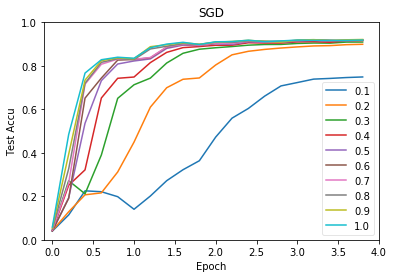

In [15]:
import matplotlib 
from matplotlib.ticker import  MultipleLocator
matplotlib.use('Agg')
x_index=np.arange(0,4,4.0/20)
X1 = result_data[0,:]
X2 = result_data[1,:]
X3 = result_data[2,:]
X4 = result_data[3,:]
X5 = result_data[4,:]
X6 = result_data[5,:]
X7 = result_data[6,:]
X8 = result_data[7,:]
X9 = result_data[8,:]
X10 = result_data[9,:]

fig = plt.figure()
plt.title("SGD")
plt.xlabel('Epoch')
plt.ylabel('Test Accu')
plt.axis([-0.1,4,0.0,1.0]) 
plt.plot(x_index,X1,label='0.1')
plt.plot(x_index,X2,label='0.2')
plt.plot(x_index,X3,label='0.3')
plt.plot(x_index,X4,label='0.4')
plt.plot(x_index,X5,label='0.5')
plt.plot(x_index,X6,label='0.6')
plt.plot(x_index,X7,label='0.7')
plt.plot(x_index,X8,label='0.8')
plt.plot(x_index,X9,label='0.9')
plt.plot(x_index,X10,label='1.0')
#plt.fill_between(x_index,X1,X3,color = 'red',alpha = '0.1')
plt.legend(loc='lower right',framealpha = 0.5)
#plt.savefig("cSGD para.png") 
plt.show()

D:\anaconda\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


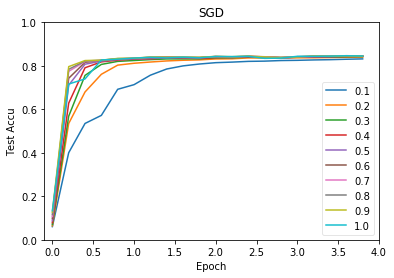

In [18]:
import matplotlib 
from matplotlib.ticker import  MultipleLocator
matplotlib.use('Agg')
x_index=np.arange(0,4,4.0/20)
X1 = result_data1[0,:]
X2 = result_data1[1,:]
X3 = result_data1[2,:]
X4 = result_data1[3,:]
X5 = result_data1[4,:]
X6 = result_data1[5,:]
X7 = result_data1[6,:]
X8 = result_data1[7,:]
X9 = result_data1[8,:]
X10 = result_data1[9,:]

fig = plt.figure()
plt.title("SGD")
plt.xlabel('Epoch')
plt.ylabel('Test Accu')
plt.axis([-0.1,4,0.0,1.0]) 
plt.plot(x_index,X1,label='0.1')
plt.plot(x_index,X2,label='0.2')
plt.plot(x_index,X3,label='0.3')
plt.plot(x_index,X4,label='0.4')
plt.plot(x_index,X5,label='0.5')
plt.plot(x_index,X6,label='0.6')
plt.plot(x_index,X7,label='0.7')
plt.plot(x_index,X8,label='0.8')
plt.plot(x_index,X9,label='0.9')
plt.plot(x_index,X10,label='1.0')
#plt.fill_between(x_index,X1,X3,color = 'red',alpha = '0.1')
plt.legend(loc='lower right',framealpha = 0.5)
#plt.savefig("cSGD para.png") 
plt.show()